# Fake News Detection using Machine Learning

**Objective:**  
The goal of this project is to build a machine learning model that can automatically classify news articles as **Fake** or **Real** based on their textual content. With the rapid spread of misinformation on digital platforms, automated fake news detection plays a crucial role in ensuring information reliability.

**Problem Type:**  
Binary Text Classification (Natural Language Processing)

**Input:**  
News article text

**Output:**  
Fake (0) or Real (1)

**Techniques Used:**  
- Natural Language Processing (NLP)  
- Text Vectorization (TF-IDF / Bag of Words)  
- Supervised Machine Learning Algorithms  

---



## Importing the basic libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Data Collection


In this step, we download the Fake and Real News dataset from Kaggle.  
The dataset contains labeled news articles which will be used to train and evaluate our fake news detection model.

Using KaggleHub allows programmatic access to the dataset, ensuring reproducibility of the data collection process.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/dikshayadav/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


## Data Loading and Label Assignment
In this step, we load the Fake and Real news datasets into pandas DataFrames.  
Since the dataset is provided as two separate files, we assign labels manually:

- **Fake news → 1**
- **Real news → 0**

After labeling, both datasets are merged into a single DataFrame and shuffled to ensure random distribution of classes.  
Shuffling is important to avoid any ordering bias during model training.


In [3]:

DATASET_PATH = "/Users/dikshayadav/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1/"

fake = pd.read_csv(DATASET_PATH + "Fake.csv")
real = pd.read_csv(DATASET_PATH + "True.csv")

fake['label'] = 1   # Fake news
real['label'] = 0   # Real news

df = pd.concat([fake, real], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.shape)
df.head()


(44898, 5)


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


## Saving the Merged Dataset


In [4]:
df.to_csv("fake_news_data.csv")

## Feature Selection: Dropping Irrelevant Columns
The original dataset contains additional columns such as **title**, **subject**, and **date**.  
For this project, we focus exclusively on the **news text content** to perform fake news detection.

These columns are removed because:
- The **title** often overlaps with the main content and may introduce redundancy
- The **subject** column can introduce dataset-specific bias
- The **date** column is not directly useful for text-based classification in this context

By removing these columns, we ensure that the model learns patterns only from the textual content of the news articles.


In [5]:
col_to_drop=["title","subject","date"]
df.drop(col_to_drop,inplace=True,axis=1)

## Previewing the Dataset


In [6]:
print("===== First 5 rows of the dataset =====")
display(df.head())  

===== First 5 rows of the dataset =====


,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",1
1,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
3,"On Monday, Donald Trump once again embarrassed...",1
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0


In [7]:
df.tail()

,text,label
44893,,1
44894,LONDON/TOKYO (Reuters) - British Prime Ministe...,0
44895,BERLIN (Reuters) - Chancellor Angela Merkel sa...,0
44896,Jesus f*cking Christ our President* is a moron...,1
44897,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,1


## Exploratory Data Analysis (EDA)

In this section, we analyze:
- Dataset structure
- Missing values
- Class distribution
- Duplicate records

This helps ensure data quality before model training.


## Dataset Information


In [8]:
print("===== Dataset Information =====")
df.info()

===== Dataset Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


## Statistical Summary of the Dataset


In [9]:
print("===== Statistical Summary =====")
display(df.describe())

===== Statistical Summary =====


,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


## Dataset Dimensions


In [10]:
print("===== Dataset Dimensions =====")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")


===== Dataset Dimensions =====
Total rows: 44898
Total columns: 2


## Checking for Missing Values


In [11]:
print("===== Missing Values per Column =====")
print(df.isnull().sum())

===== Missing Values per Column =====
text     0
label    0
dtype: int64


## Checking Class Distribution


In [12]:
print("\n===== Class Distribution =====")
print(df['label'].value_counts())


===== Class Distribution =====
label
1    23481
0    21417
Name: count, dtype: int64


## Checking and Removing Duplicate Entries


In [13]:
print("===== Checking for Duplicate Rows =====")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {num_duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates removed
num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")


===== Checking for Duplicate Rows =====
Number of duplicate rows before removal: 6251
Number of duplicate rows after removal: 0


## Visualizing Class Distribution


/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_1495/3202055285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


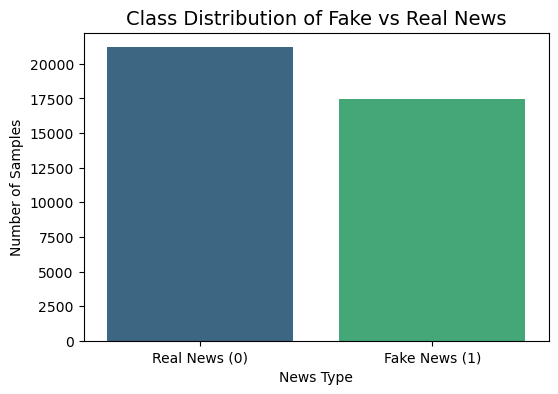

In [14]:
# ===== Visualizing Class Distribution =====
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.xticks([0,1], ["Real News (0)", "Fake News (1)"])
plt.title("Class Distribution of Fake vs Real News", fontsize=14)
plt.xlabel("News Type")
plt.ylabel("Number of Samples")
plt.show()

## Text Cleaning and Lemmatization
Raw news text contains punctuation, numbers, uppercase letters, and stopwords that are not useful for machine learning models.  

In this step, we perform the following preprocessing:

1. **Remove non-alphabetic characters** using regular expressions  
2. **Convert text to lowercase** for uniformity  
3. **Tokenize the text** into individual words  
4. **Remove stopwords** (common words that do not contribute to meaning) 
5. **Lemmatization**: Convert words to their base form (e.g., 'running' → 'run')  

We store the cleaned and lemmatized text in a corpus, which will be used for feature extraction (e.g., TF-IDF or Bag-of-Words).  

We also show an example of cleaned text to verify preprocessing.


In [15]:
# ===== Text Cleaning and Lemmatization =====
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from tqdm import tqdm 

# Ensure required NLTK data is downloaded
nltk.download("stopwords")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', "she'd", "she'll", "she's", 'should', 'shouldn', "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', 'we', "we'd", "we'll", "we're", 'were', 'weren', "we've", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', 'wouldn', 'y', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've"]

# Cleaned text will be stored here
corpus = []

print("Starting text preprocessing...")

# Iterating through each news article with a progress bar
for msg in tqdm(df["text"], desc="Cleaning text"):
    # Keeping only letters
    words = re.sub('[^a-zA-Z]', ' ', msg)
    # Converting to lowercase and split into words
    words = words.lower().split()
    # Lemmatize and remove stopwords
    words = [lemmatizer.lemmatize(word, pos="v") for word in words if word not in stopwords]
    # Join back into a single string
    cleaned_text = " ".join(words)
    corpus.append(cleaned_text)

print("✅ Text preprocessing completed. Corpus ready for feature extraction.")

print("\nExample of cleaned text:")
print(corpus[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dikshayadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Starting text preprocessing...


Cleaning text: 100%|██████████| 38647/38647 [00:26<00:00, 1457.76it/s]

✅ Text preprocessing completed. Corpus ready for feature extraction.

Example of cleaned text:
st century wire say ben stein reputable professor pepperdine university also hollywood fame appear tv show film ferris bueller day make provocative statements judge jeanine pirro show recently discuss halt impose president trump executive order travel stein refer judgement th circuit court washington state coup tat executive branch constitution stein go call judge seattle political puppets judiciary political pawn watch interview complete statements note stark contrast rhetoric leftist media pundits neglect note no court ever block presidential order immigration past discuss legal efficacy halt actual text executive order read trump news st century wire trump filessupport work subscribe become member wire tv


## Extracting Target Variable


In [16]:
# Separate the target labels from the dataset
y = df["label"].values


## Train-Test Split


In [17]:
# ===== Train-Test Split =====
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=1, stratify=y)

print(f"Number of training samples: {len(x_train)}")
print(f"Number of testing samples: {len(x_test)}")
print(f"Training class distribution: {dict(pd.Series(y_train).value_counts())}")
print(f"Testing class distribution: {dict(pd.Series(y_test).value_counts())}")


Number of training samples: 30917
Number of testing samples: 7730
Training class distribution: {0: np.int64(16953), 1: np.int64(13964)}
Testing class distribution: {0: np.int64(4239), 1: np.int64(3491)}


## Bag-of-Words Feature Extraction
Machine learning models cannot work directly with raw text, so we need to convert text into **numerical features**.  

Here, we use the **Bag-of-Words (BoW)** model:

- Each word in the vocabulary becomes a feature  
- The value represents the count of that word in the document  

In [18]:
# ===== Bag-of-Words Feature Extraction =====
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer(max_features=500)

# Fit on training data and transform both train and test sets
x_train_bow = cv.fit_transform(x_train)
x_test_bow = cv.transform(x_test)

print(f"Number of features created: {len(cv.get_feature_names_out())}")
print(f"Shape of training data: {x_train_bow.shape}")
print(f"Shape of testing data: {x_test_bow.shape}")


Number of features created: 500
Shape of training data: (30917, 500)
Shape of testing data: (7730, 500)


## TF-IDF Feature Extraction
Term Frequency-Inverse Document Frequency (TF-IDF) is a feature extraction technique that gives more importance to words that are **unique to a document** and less weight to very common words.

- **Term Frequency (TF)**: How often a word appears in a document  
- **Inverse Document Frequency (IDF)**: Reduces the weight of words that appear in many documents  

In [19]:
# ===== TF-IDF Feature Extraction =====
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500)

# Fit on training data and transform both train and test sets
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

print(f"Number of features created: {len(tfidf.get_feature_names_out())}")
print(f"Shape of training data: {x_train_tfidf.shape}")
print(f"Shape of testing data: {x_test_tfidf.shape}")


Number of features created: 500
Shape of training data: (30917, 500)
Shape of testing data: (7730, 500)


## Training Random Forest Classifiers


In [20]:
# ===== Training Random Forest Classifier =====
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifiers
# Using entropy as the criterion for information gain
rfc_bow = RandomForestClassifier(n_estimators=100, random_state=1, criterion="entropy")
rfc_tfidf = RandomForestClassifier(n_estimators=100, random_state=1, criterion="entropy")

# Train on Bag-of-Words features
rfc_bow.fit(x_train_bow, y_train)

# Train on TF-IDF features
rfc_tfidf.fit(x_train_tfidf, y_train)


RandomForestClassifier(criterion='entropy', random_state=1)

## Making Predictions on Test Data


In [21]:
# Predict using Random Forest trained on Bag-of-Words features
y_pred_bow = rfc_bow.predict(x_test_bow)

# Predict using Random Forest trained on TF-IDF features
y_pred_tfidf = rfc_tfidf.predict(x_test_tfidf)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy scores
acc_bow = accuracy_score(y_test, y_pred_bow)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Accuracy of Bag-of-Words model: {acc_bow:.4f}")
print(f"Accuracy of TF-IDF model: {acc_tfidf:.4f}\n")

# Classification Reports
print("===== Classification Report: Bag-of-Words =====")
print(classification_report(y_test, y_pred_bow, target_names=["Real News", "Fake News"]))

print("===== Classification Report: TF-IDF =====")
print(classification_report(y_test, y_pred_tfidf, target_names=["Real News", "Fake News"]))

Accuracy of Bag-of-Words model: 0.9966
Accuracy of TF-IDF model: 0.9965

===== Classification Report: Bag-of-Words =====
              precision    recall  f1-score   support

   Real News       1.00      1.00      1.00      4239
   Fake News       1.00      0.99      1.00      3491

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730

===== Classification Report: TF-IDF =====
              precision    recall  f1-score   support

   Real News       1.00      1.00      1.00      4239
   Fake News       1.00      0.99      1.00      3491

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



## Confusion matrix 

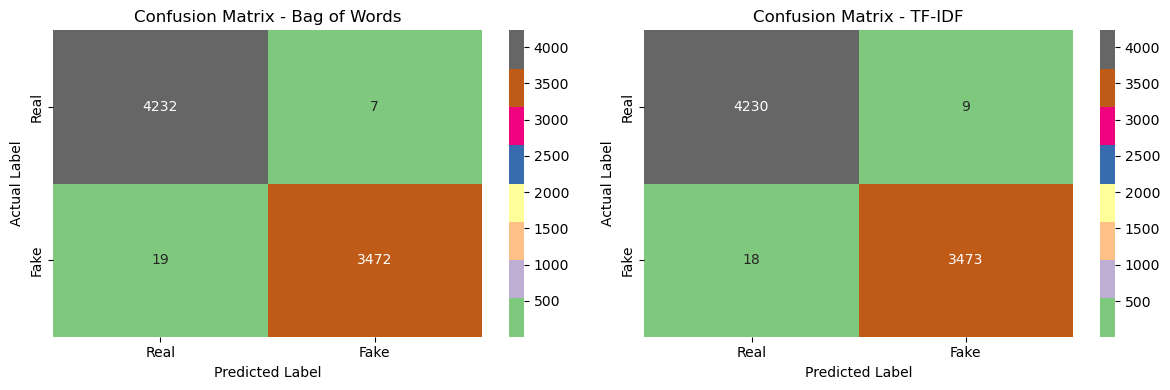

In [23]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(
    cm_bow,
    annot=True,
    cmap="Accent",
    fmt="d",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)
plt.title("Confusion Matrix - Bag of Words")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.subplot(1, 2, 2)
sns.heatmap(
    cm_tfidf,
    annot=True,
    cmap="Accent",
    fmt="d",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)
plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.tight_layout()
plt.show()


## Feature Importance Analysis

Random Forest models provide feature importance scores that indicate how much each feature contributes to the prediction. In this section, the most influential words identified by the TF-IDF based Random Forest model are visualized.

This helps in understanding which terms play a key role in distinguishing fake news from real news and adds interpretability to the model.


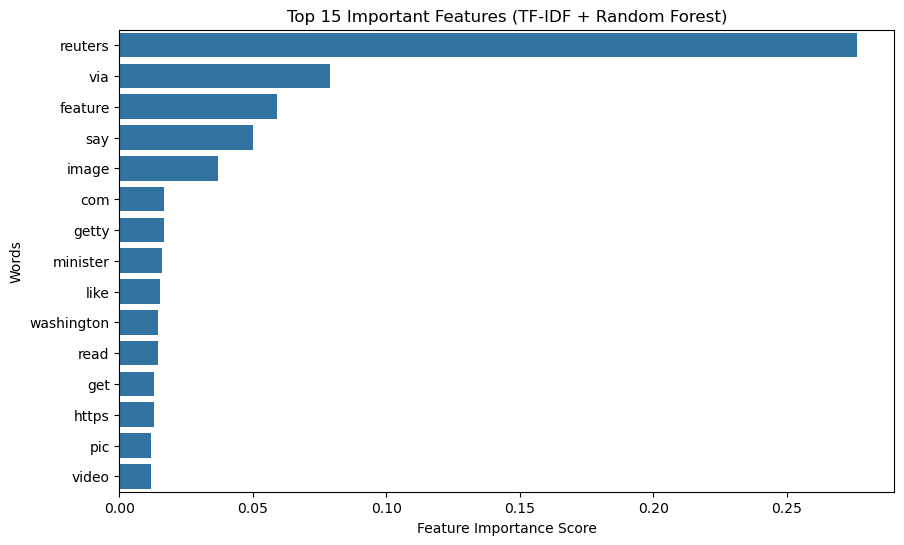

In [24]:
# Get feature names
feature_names = tfidf.get_feature_names_out()

# Get feature importance values
importances = rfc_tfidf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# top 15 important features
top_features = feature_importance_df.sort_values(
    by="importance", ascending=False
).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=top_features,
    orient="h"
)
plt.title("Top 15 Important Features (TF-IDF + Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Words")
plt.show()


## Saving the model 

In [25]:
# Saving the trained model and vectorizer
import joblib

# Saving TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Saving Random Forest model (TF-IDF)
joblib.dump(rfc_tfidf, "random_forest_tfidf_model.pkl")

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


## Conclusion

In this project, a machine learning–based fake news detection system was developed using Natural Language Processing techniques. The workflow covered dataset preparation, text preprocessing, feature extraction, model training, evaluation, and interpretation.

Two feature extraction techniques — **Bag of Words (BoW)** and **TF-IDF** — were evaluated using a Random Forest classifier.

### Key Observations
- The **Bag-of-Words model achieved an accuracy of 99.66%**, while the **TF-IDF model achieved 99.65%**.
- Both models demonstrated excellent performance, indicating that the dataset is highly separable.
- The marginal difference in accuracy suggests that **simple frequency-based representations can be highly effective** for this dataset.
- Confusion matrix analysis showed very low misclassification for both fake and real news articles.
- Feature importance analysis helped identify influential words contributing to model predictions.

### Conclusion
Although TF-IDF is often preferred in text classification tasks, in this case, the **Bag-of-Words approach performed slightly better**, likely due to the strong presence of discriminative keywords in the dataset. This highlights the importance of evaluating multiple feature extraction techniques rather than relying on assumptions.

Overall, this project demonstrates a complete end-to-end NLP pipeline and showcases effective use of classical machine learning techniques for fake news detection.
